# MNIST- handwritten digit recognition Part 2
In this modeule, we will talk about how we can further improve performance using various techniques.

## Batch Normalization
Do you remember we normalized input images such that they have zero mean? The training converges faster when images are normalized (zero mean and unit variance) and decorrelated. However, the parameter update during the training changes distributions in each layer, which is called *internal covariant shift*. Ioffe and Szegedy suggested [batch normalization](https://arxiv.org/abs/1502.03167) to normalize and decorrelate inputs to the mid-layers to resolve this issue and make the netwrok training converges faster. 

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
# Implement Batch Normalization
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K

K.set_image_dim_ordering( 'tf' )

# fix random seed for reproducibility
seed = 123
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channel]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype( 'float32' )
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]



  106496/11490434 [..............................] - ETA: 7s 

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


In [4]:
### YOUR TURN
    # Create a model with 4 convolutional layers (2 repeating VGG stype units) 
    # and 2 dense layers before the output
    # Use Batch Normalization for every conv and dense layers
    # Use dropout layers if you like
    # Use Adam optimizer

def BN_model():
    model = Sequential()
    model.add (Conv2D(64, kernel_size=(3, 3), strides=(1, 1),
                activation='relu', padding='same', input_shape=(28, 28, 1)))
    model.add (BatchNormalization())
    model.add (Conv2D(64, (3, 3),padding='same', activation='relu'))
    model.add (BatchNormalization())
    model.add (MaxPooling2D(pool_size=(2, 2), strides=None))
    
    model.add (Conv2D(128, (3, 3),padding='same', activation='relu'))
    model.add (BatchNormalization())
    model.add (Conv2D(128, (3, 3),padding='same', activation='relu'))
    model.add (BatchNormalization())
    model.add (MaxPooling2D(pool_size=(2, 2), strides=None))
    
    model.add (Flatten())
    model.add (Dense(64, activation='relu'))
    model.add (BatchNormalization())
    model.add (Dropout(0.5))
    
    model.add (Dense(10, activation=c'softmax'))
    return model

# build the model
model = BN_model()
model.summary()
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
batch_normalization_3 (Batch (None, 14, 14, 128)       512       
__________

In [5]:
from keras.callbacks import History 
history = History()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[history], nb_epoch=20, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)


/usr/local/lib/python3.6/dist-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 32s - loss: 0.1594 - acc: 0.9579 - val_loss: 0.0690 - val_acc: 0.9755
Epoch 2/20
 - 30s - loss: 0.0520 - acc: 0.9863 - val_loss: 0.0419 - val_acc: 0.9870
Epoch 3/20
 - 30s - loss: 0.0388 - acc: 0.9891 - val_loss: 0.0449 - val_acc: 0.9852
Epoch 4/20
 - 30s - loss: 0.0296 - acc: 0.9918 - val_loss: 0.0204 - val_acc: 0.9934
Epoch 5/20
 - 30s - loss: 0.0217 - acc: 0.9937 - val_loss: 0.0239 - val_acc: 0.9924
Epoch 6/20
 - 30s - loss: 0.0216 - acc: 0.9935 - val_loss: 0.0220 - val_acc: 0.9930
Epoch 7/20
 - 30s - loss: 0.0176 - acc: 0.9945 - val_loss: 0.0171 - val_acc: 0.9948
Epoch 8/20
 - 30s - loss: 0.0144 - acc: 0.9957 - val_loss: 0.0172 - val_acc: 0.9947
Epoch 9/20
 - 30s - loss: 0.0133 - acc: 0.9960 - val_loss: 0.0225 - val_acc: 0.9927
Epoch 10/20
 - 30s - loss: 0.0117 - acc: 0.9963 - val_loss: 0.0201 - val_acc: 0.9932
Epoch 11/20
 - 30s - loss: 0.0101 - acc: 0.9969 - val_loss: 0.0197 - val_acc: 0.9941
Epoch 12/20
 - 30s - los

In [6]:
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 0.42%


From the above, can you get test error below 0.5%?

Where should you position the batch norm layer to implement the batch norm correctly?

**Claim:** Some people argue that they can get as good or better result by incorrectly implementing batchnorm such that the batchnorm comes after the activation layer. Test if this is true. What test wrror do you get?

**MY MODEL ABOVED HAS ACTIVATION IN THE CONV. LAYER THEN BATCH NORM AFTER THAT ACTIVATION. HERE IS MY EXAMPLE WITH CONV, BATCHNORM, THEN ACTIVATION.**

In [7]:
# Implement Batch Normalization - after the activation 
### YOUR TURN
    # Using the same architecture above, 
    # except that the orders of a batchnormalization layer and a activation layer are reversed, 
    # build a model and test if the claim above is true.


## IMPLEMENTING BATCH NORM BEFORE ACTIVATION

def BNr_model():
    model = Sequential()
    model.add (Conv2D(64, kernel_size=(3, 3), strides=(1, 1),
                padding='same', input_shape=(28, 28, 1)))
    model.add (BatchNormalization())
    model.add (Activation('relu'))
    model.add (Conv2D(64, (3, 3),padding='same'))
    model.add (BatchNormalization())
    model.add (Activation('relu'))
    model.add (MaxPooling2D(pool_size=(2, 2), strides=None))
    
    model.add (Conv2D(128, (3, 3),padding='same'))
    model.add (BatchNormalization())
    model.add (Activation('relu'))
    model.add (Conv2D(128, (3, 3),padding='same'))
    model.add (BatchNormalization())
    model.add (Activation('relu'))
    model.add (MaxPooling2D(pool_size=(2, 2), strides=None))
    
    model.add (Flatten())
    model.add (Dense(64, activation='relu'))
    model.add (BatchNormalization())
    model.add (Dropout(0.5))
    
    model.add (Dense(10, activation='softmax'))
    return model

# build the model
model = BNr_model()
model.summary()
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy'])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
__________

In [8]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test),callbacks=[history], nb_epoch=20, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)


/usr/local/lib/python3.6/dist-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 31s - loss: 0.1776 - acc: 0.9562 - val_loss: 0.1612 - val_acc: 0.9525
Epoch 2/20
 - 30s - loss: 0.0608 - acc: 0.9849 - val_loss: 0.1091 - val_acc: 0.9640
Epoch 3/20
 - 30s - loss: 0.0440 - acc: 0.9879 - val_loss: 0.0393 - val_acc: 0.9884
Epoch 4/20
 - 30s - loss: 0.0363 - acc: 0.9900 - val_loss: 0.0246 - val_acc: 0.9919
Epoch 5/20
 - 30s - loss: 0.0313 - acc: 0.9910 - val_loss: 0.0213 - val_acc: 0.9933
Epoch 6/20
 - 30s - loss: 0.0255 - acc: 0.9931 - val_loss: 0.0378 - val_acc: 0.9881
Epoch 7/20
 - 30s - loss: 0.0222 - acc: 0.9934 - val_loss: 0.0227 - val_acc: 0.9926
Epoch 8/20
 - 30s - loss: 0.0195 - acc: 0.9942 - val_loss: 0.0313 - val_acc: 0.9902
Epoch 9/20
 - 30s - loss: 0.0174 - acc: 0.9948 - val_loss: 0.0238 - val_acc: 0.9928
Epoch 10/20
 - 30s - loss: 0.0175 - acc: 0.9951 - val_loss: 0.0312 - val_acc: 0.9910
Epoch 11/20
 - 31s - loss: 0.0150 - acc: 0.9957 - val_loss: 0.0299 - val_acc: 0.9918
Epoch 12/20
 - 30s - los

In [9]:
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 0.55%


### Recording loss and metric
The output of `model.fit` by default (in Keras 2) returns a dictionary of model history (also it can be called using the callback). The dictionary has keys loss and metric (when you specified the metric in the model.complie) for train and validation each. For our case here it would be: 'val_loss', 'val_acc', 'loss', 'acc'. A good use of such log is to monitor whether it's over fitting. When overfits, you will see the validation loss may go up at some point while train loss continues go down. Let's get rid of batch norm layers and run the model with higher running rate lr=0.01 and longer epoch (50) to see if it overfits (Answer: Yes it does, quite terribly).

In [0]:
import time
from keras.optimizers import Adam


In [15]:
### YOUR TURN
    # 1) Create a model with the same architecture above (4 convs and 2 denses before output) and hyperparameters, 
    # but without any batch normalization and dropouts.
    # 2) To make this overfit surely, let's change the learning rate of our Adam optimizer. Set the learning rate to 0.01.
    # 3) After running the training, plot the train and validation accuracy using the model output hisoty.
    
def model_overfit():
  model = Sequential()
  model.add (Conv2D(64, kernel_size=(3, 3), strides=(1, 1),
                padding='same', input_shape=(28, 28, 1)))
  model.add (Activation('relu'))
  model.add (Conv2D(64, (3, 3),padding='same'))
  model.add (Activation('relu'))
  model.add (MaxPooling2D(pool_size=(2, 2), strides=None))
    
  model.add (Conv2D(128, (3, 3),padding='same'))
  model.add (Activation('relu'))
  model.add (Conv2D(128, (3, 3),padding='same'))
  model.add (Activation('relu'))
  model.add (MaxPooling2D(pool_size=(2, 2), strides=None))
    
  model.add (Flatten())
  model.add (Dense(64, activation='relu'))    
  model.add (Dense(10, activation='softmax'))

  return model

# build the model
model = model_overfit()
model.summary()
from keras import optimizers
adam = optimizers.Adam(lr=0.01)
model.compile(loss= 'categorical_crossentropy' , optimizer=adam , metrics=[ 'accuracy'])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
activation_9 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
activation_10 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
activation_11 (Activation)   (None, 14, 14, 128)       0         
__________

In [16]:
# Fit the model
t0=time.time()
log = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[history], epochs=50, batch_size=200, verbose=2)
t1=time.time()
print(t1-t0," seconds")

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 21s - loss: 0.3534 - acc: 0.8904 - val_loss: 0.0834 - val_acc: 0.9735
Epoch 2/50
 - 21s - loss: 0.0650 - acc: 0.9798 - val_loss: 0.0410 - val_acc: 0.9869
Epoch 3/50
 - 20s - loss: 0.0523 - acc: 0.9835 - val_loss: 0.0434 - val_acc: 0.9867
Epoch 4/50
 - 20s - loss: 0.0418 - acc: 0.9872 - val_loss: 0.0499 - val_acc: 0.9849
Epoch 5/50
 - 21s - loss: 0.0361 - acc: 0.9889 - val_loss: 0.0426 - val_acc: 0.9868
Epoch 6/50
 - 21s - loss: 0.0399 - acc: 0.9876 - val_loss: 0.0482 - val_acc: 0.9846
Epoch 7/50
 - 20s - loss: 0.0348 - acc: 0.9894 - val_loss: 0.0457 - val_acc: 0.9850
Epoch 8/50
 - 20s - loss: 0.0331 - acc: 0.9895 - val_loss: 0.0454 - val_acc: 0.9846
Epoch 9/50
 - 21s - loss: 0.0346 - acc: 0.9892 - val_loss: 0.0419 - val_acc: 0.9861
Epoch 10/50
 - 20s - loss: 0.0329 - acc: 0.9897 - val_loss: 0.0442 - val_acc: 0.9862
Epoch 11/50
 - 21s - loss: 0.0338 - acc: 0.9891 - val_loss: 0.0435 - val_acc: 0.9866
Epoch 12/50
 - 20s - los

In [17]:
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 1.18%


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


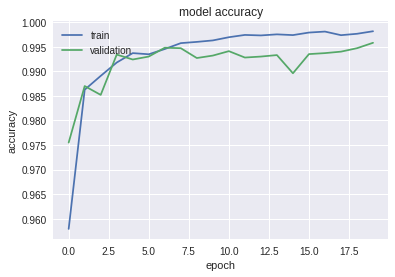

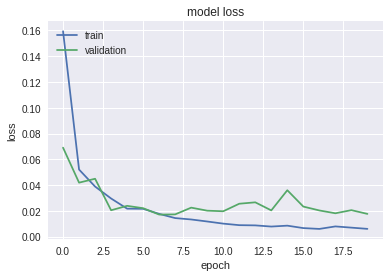

In [19]:
  # 3) After running the training, plot the train and validation accuracy using the model output hisoty.
import matplotlib.pyplot as plt
%matplotlib inline
  
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Tune Learning rate
Without inserting batchnorm or dropout again, decrease learning rate and run for 50 epochs, plot the accuracy from train and validation. What is the highest learning rate that it doesn't overfit? What is the validation accuracy as a result?

In [37]:
#Your code here
model = model_overfit()
model.summary()
from keras import optimizers
adam = optimizers.Adam(lr=0.0005)
model.compile(loss= 'categorical_crossentropy' , optimizer=adam , metrics=[ 'accuracy'])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
activation_45 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
activation_46 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
activation_47 (Activation)   (None, 14, 14, 128)       0         
__________

In [38]:
# Fit the model
t0=time.time()
log = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[history], epochs=50, batch_size=200, verbose=2)
t1=time.time()
print(t1-t0," seconds")

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 22s - loss: 0.2331 - acc: 0.9298 - val_loss: 0.0723 - val_acc: 0.9774
Epoch 2/50
 - 21s - loss: 0.0527 - acc: 0.9838 - val_loss: 0.0352 - val_acc: 0.9883
Epoch 3/50
 - 21s - loss: 0.0353 - acc: 0.9890 - val_loss: 0.0250 - val_acc: 0.9915
Epoch 4/50
 - 21s - loss: 0.0250 - acc: 0.9921 - val_loss: 0.0243 - val_acc: 0.9909
Epoch 5/50
 - 21s - loss: 0.0208 - acc: 0.9933 - val_loss: 0.0273 - val_acc: 0.9909
Epoch 6/50
 - 21s - loss: 0.0162 - acc: 0.9948 - val_loss: 0.0253 - val_acc: 0.9917
Epoch 7/50
 - 21s - loss: 0.0125 - acc: 0.9959 - val_loss: 0.0316 - val_acc: 0.9898
Epoch 8/50
 - 21s - loss: 0.0101 - acc: 0.9970 - val_loss: 0.0266 - val_acc: 0.9917
Epoch 9/50
 - 21s - loss: 0.0086 - acc: 0.9971 - val_loss: 0.0268 - val_acc: 0.9921
Epoch 10/50
 - 21s - loss: 0.0078 - acc: 0.9975 - val_loss: 0.0352 - val_acc: 0.9907
Epoch 11/50
 - 21s - loss: 0.0071 - acc: 0.9977 - val_loss: 0.0275 - val_acc: 0.9931
Epoch 12/50
 - 21s - los

# Learning Rate of 0.0005

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


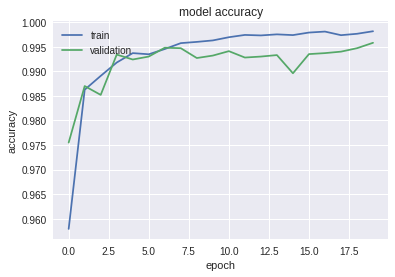

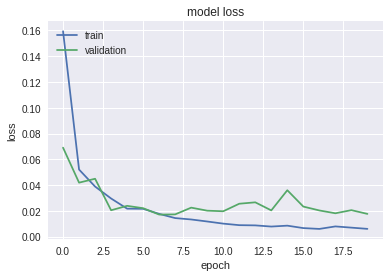

In [39]:
#lr .0005 
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Learning Rate of 0.002

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


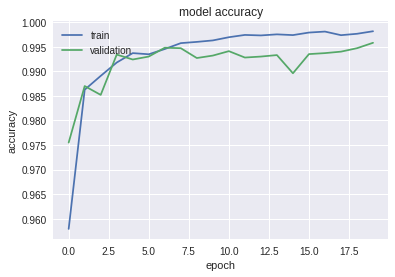

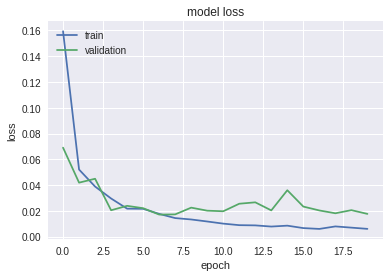

In [32]:
#lr .002 
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Learning Rate of 0.004

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


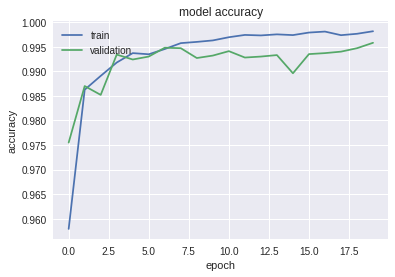

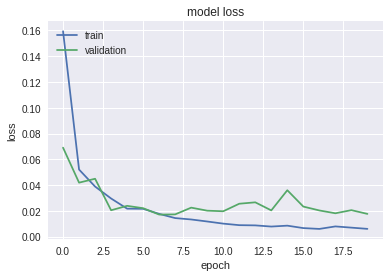

In [29]:
 #lr .004 
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Add Dropout
Now, add dropouts and run with the same hyperparameters (learning rate, epochs) you found from above. Time the model.fit() using `time.time`. 
1) Does it take longer training time by adding dropouts?
2) For the same epoch, is your final validation accuracy better? If not better and you're sure it's not overfitting yet, try to increase either your learning rate or epoch, OR change your dropout rate(s). Record your optimum values. 

In [40]:
#Your code here

def dropmodel():
    model = Sequential()
    model.add (Conv2D(64, kernel_size=(3, 3), strides=(1, 1),
                padding='same', input_shape=(28, 28, 1)))
    model.add (Activation('relu'))
    model.add (Conv2D(64, (3, 3),padding='same'))
    model.add (Activation('relu'))
    model.add (Dropout(0.5))
    model.add (MaxPooling2D(pool_size=(2, 2), strides=None))
    
    model.add (Conv2D(128, (3, 3),padding='same'))
    model.add (Activation('relu'))
    model.add (Conv2D(128, (3, 3),padding='same'))
    model.add (Activation('relu'))
    model.add (Dropout(0.5))
    model.add (MaxPooling2D(pool_size=(2, 2), strides=None))
    
    model.add (Flatten())
    model.add (Dense(64, activation='relu'))
    model.add (BatchNormalization())
    model.add (Dropout(0.5))
    
    model.add (Dense(10, activation='softmax'))
    return model

# build the model
model = dropmodel()
model.summary()
from keras import optimizers
adam = optimizers.Adam(lr=0.0005)
model.compile(loss= 'categorical_crossentropy' , optimizer=adam , metrics=[ 'accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
activation_49 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
activation_50 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 14, 14, 128)       73856     
__________

In [41]:
# Fit the model
t0=time.time()
log = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[history], epochs=50, batch_size=200, verbose=2)
t1=time.time()
print(t1-t0," seconds")

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 27s - loss: 0.2914 - acc: 0.9250 - val_loss: 0.4408 - val_acc: 0.9352
Epoch 2/50
 - 25s - loss: 0.0857 - acc: 0.9795 - val_loss: 0.1641 - val_acc: 0.9858
Epoch 3/50
 - 25s - loss: 0.0592 - acc: 0.9847 - val_loss: 0.1211 - val_acc: 0.9900
Epoch 4/50
 - 25s - loss: 0.0482 - acc: 0.9870 - val_loss: 0.0995 - val_acc: 0.9880
Epoch 5/50
 - 25s - loss: 0.0392 - acc: 0.9897 - val_loss: 0.1022 - val_acc: 0.9880
Epoch 6/50
 - 25s - loss: 0.0342 - acc: 0.9908 - val_loss: 0.0570 - val_acc: 0.9916
Epoch 7/50
 - 25s - loss: 0.0310 - acc: 0.9911 - val_loss: 0.0615 - val_acc: 0.9905
Epoch 8/50
 - 25s - loss: 0.0291 - acc: 0.9917 - val_loss: 0.0478 - val_acc: 0.9927
Epoch 9/50
 - 25s - loss: 0.0261 - acc: 0.9925 - val_loss: 0.0561 - val_acc: 0.9913
Epoch 10/50
 - 25s - loss: 0.0228 - acc: 0.9935 - val_loss: 0.0518 - val_acc: 0.9898
Epoch 11/50
 - 25s - loss: 0.0228 - acc: 0.9935 - val_loss: 0.0389 - val_acc: 0.9929
Epoch 12/50
 - 25s - los

## Yes, the dropout did add to the time it took to run the model 
- Original Time: 1046.0040535926819  seconds
- Dropout time: 1256.1894574165344  seconds

## Yes, the validation accuracy increased
- Original Epoch 50 val_acc: 0.9941 
- Dropout Epoch 50 val_acc: 0.9943

#### Add Batch Normalization
Now, get rid of dropouts and add batch normalization layers. Choose learning rate between 0.01 and 0.001. Find the largest learning rate that still does not overfit but gives highest accuracy.
Time model.fit() using `time.time`. 
Plot the 'acc' and 'val_acc'
Compare the learning rate with those from Exercise 1 and 2. What do you find?

In [57]:
#Your code here

def BNmodel():
    model = Sequential()
    model.add (Conv2D(64, kernel_size=(3, 3), strides=(1, 1),
                padding='same', input_shape=(28, 28, 1)))
    model.add (BatchNormalization())
    model.add (Activation('relu')) 
    model.add (Conv2D(64, (3, 3),padding='same'))
    model.add (BatchNormalization())
    model.add (Activation('relu'))
    model.add (MaxPooling2D(pool_size=(2, 2), strides=None))
    
    model.add (Conv2D(128, (3, 3),padding='same'))
    model.add (BatchNormalization())
    model.add (Activation('relu'))
    model.add (Conv2D(128, (3, 3),padding='same'))
    model.add (BatchNormalization())
    model.add (Activation('relu'))
    model.add (MaxPooling2D(pool_size=(2, 2), strides=None))
    
    model.add (Flatten())
    model.add (Dense(64, activation='relu'))
    model.add (BatchNormalization())
    
    model.add (Dense(10, activation='softmax'))
    return model

# build the model
model = BNmodel()
model.summary()
from keras import optimizers
adam = optimizers.Adam(lr=0.001)
model.compile(loss= 'categorical_crossentropy' , optimizer=adam , metrics=[ 'accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_23 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
activation_61 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_24 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
activation_62 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 64)        0         
__________

In [46]:
# Fit the model
t0=time.time()
log = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[history], epochs=50, batch_size=200, verbose=2)
t1=time.time()
print(t1-t0," seconds")

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 32s - loss: 0.0974 - acc: 0.9732 - val_loss: 0.1499 - val_acc: 0.9505
Epoch 2/50
 - 30s - loss: 0.0335 - acc: 0.9894 - val_loss: 0.0284 - val_acc: 0.9909
Epoch 3/50
 - 30s - loss: 0.0247 - acc: 0.9924 - val_loss: 0.0919 - val_acc: 0.9729
Epoch 4/50
 - 31s - loss: 0.0199 - acc: 0.9937 - val_loss: 0.1242 - val_acc: 0.9644
Epoch 5/50
 - 31s - loss: 0.0167 - acc: 0.9945 - val_loss: 0.0766 - val_acc: 0.9782
Epoch 6/50
 - 30s - loss: 0.0151 - acc: 0.9950 - val_loss: 0.0414 - val_acc: 0.9882
Epoch 7/50
 - 31s - loss: 0.0122 - acc: 0.9961 - val_loss: 0.0486 - val_acc: 0.9861
Epoch 8/50
 - 31s - loss: 0.0103 - acc: 0.9967 - val_loss: 0.0494 - val_acc: 0.9851
Epoch 9/50
 - 31s - loss: 0.0103 - acc: 0.9966 - val_loss: 0.0367 - val_acc: 0.9893
Epoch 10/50
 - 31s - loss: 0.0086 - acc: 0.9970 - val_loss: 0.0436 - val_acc: 0.9886
Epoch 11/50
 - 30s - loss: 0.0095 - acc: 0.9968 - val_loss: 0.0434 - val_acc: 0.9871
Epoch 12/50
 - 31s - los

In [58]:
# Fit the model
t0=time.time()
log = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[history], epochs=10, batch_size=200, verbose=2)
t1=time.time()
print(t1-t0," seconds")

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 33s - loss: 0.0982 - acc: 0.9748 - val_loss: 0.0662 - val_acc: 0.9804
Epoch 2/10
 - 31s - loss: 0.0322 - acc: 0.9915 - val_loss: 0.0651 - val_acc: 0.9802
Epoch 3/10
 - 31s - loss: 0.0228 - acc: 0.9936 - val_loss: 0.0367 - val_acc: 0.9895
Epoch 4/10
 - 31s - loss: 0.0165 - acc: 0.9952 - val_loss: 0.0525 - val_acc: 0.9831
Epoch 5/10
 - 31s - loss: 0.0132 - acc: 0.9965 - val_loss: 0.0328 - val_acc: 0.9897
Epoch 6/10
 - 30s - loss: 0.0117 - acc: 0.9967 - val_loss: 0.0267 - val_acc: 0.9916
Epoch 7/10
 - 31s - loss: 0.0100 - acc: 0.9970 - val_loss: 0.0347 - val_acc: 0.9894
Epoch 8/10
 - 30s - loss: 0.0067 - acc: 0.9982 - val_loss: 0.0357 - val_acc: 0.9891
Epoch 9/10
 - 31s - loss: 0.0061 - acc: 0.9985 - val_loss: 0.0402 - val_acc: 0.9872
Epoch 10/10
 - 31s - loss: 0.0054 - acc: 0.9985 - val_loss: 0.0669 - val_acc: 0.9788
308.8399817943573  seconds
CNN Error: 2.12%


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


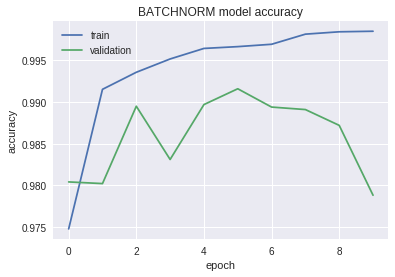

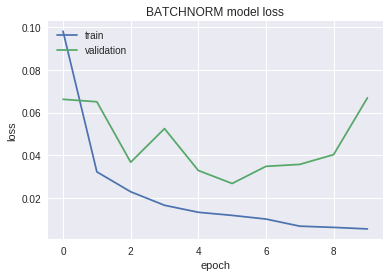

In [59]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('BATCHNORM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('BATCHNORM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Quiz.

#### 1. 
What are the advantages of a CNN over a fully connected ANN for image classificaion?
- Convolution layers are able to analyze areas of pixels in a superior way. After th convolutional layers the rest of the network is similar to ANN. The largest advantage is that convolution layers can automatically detect the important features without any human supervision.


#### 2. 
Consider a CNN composed of 3 convolutional layers, each with 3x3 kernels, a stride of 2, and with 'same' padding. The first layer outputs a featuremap with 100 cahnnels, the second layer outputs a featuremap with 200 depth, and the last outputs one with 400 depth. The input is color (RGB) images of 200x300 pixels. What is the total number of parameters for this CNN model?
# Total Params = 901,600
- model.add (Conv2D(100, kernel_size=(3, 3), strides=(2), padding='same', input_shape=(200, 300, 1)))
- model.add (Conv2D(200, (3, 3),padding='same',strides=(2)))
- model.add (Conv2D(400, (3, 3),padding='same',strides=(2)))

model.summary()
###Layer (type)       ___          Output Shape      ___        Param   

=================================================================
###conv2d_1 (Conv2D)            (None, 100, 150, 100)     1000      
_________________________________________________________________
###conv2d_2 (Conv2D)            (None, 50, 75, 200)       180200    
_________________________________________________________________
###conv2d_3 (Conv2D)            (None, 25, 38, 400)       720400  

=================================================================
###Total params: 901,600
###Trainable params: 901,600
###Non-trainable params: 0
_______________________________

#

#### 3.
If your GPU runs out of memory while you train a CNN model, what can you do resolving the issue? List at least 3 ways to 

1. Reduce training size
2. Shrink batch size
3. Telling TensorFlow to allocate memory on the GPU as needed, instead of up front (allow_growth option and per_process_gpu_memory_fraction option)
4. Trade reduced memory for an increase in computation
4. Use Google Colab GPU
